In [1]:
import math

def yield_to_price():
    more = True
    while more == True:
        Invalid = False
        option = input("same bond as before (1) or new bond (2)? ")
        if int(option) == 1:
            yld = input("Enter required yield (as a percentage): ")
            if freq.upper() == "S":
                yld = float(yld)/(2*100)
                par = float(par)
                coupon = float(par)*float(coup_rate)/(2*100)
                periods = 2*float(plazo)
            else:
                yld = float(yld)/100
                par = float(par)
                coupon = float(par)*float(coup_rate)/100
                periods = float(plazo)
        elif int(option) == 2:
            yld = input("Enter required yield (as a percentage): ")
            par = input("Enter par value: ")
            freq = input("Annual or semi-annual? (a/s): ")
            coup_rate = input("Enter coupon rate(as a percentage): ")
            plazo = input("Enter term to maturity in years: ")

            if freq.upper() == "S":
                yld = float(yld)/(2*100)
                par = float(par)
                coupon = float(par)*float(coup_rate)/(2*100)
                periods = 2*float(plazo)
            elif freq.upper() == "A":
                yld = float(yld)/100
                par = float(par)
                coupon = float(par)*float(coup_rate)/100
                periods = float(plazo)
            else:
                print("Invalid Entry")
                Invalid = True
        else:
            Print("Invalid Entry")
            Invalid = True

        if Invalid == False:
            price = coupon * (1-(1/math.pow(1 + yld,periods)))/yld + par/math.pow(1 + yld,periods)
            print(f"The price of the bond is {price}.")
            exitOption = input("Another calculation? (y/n)")
            if exitOption.upper() == "N":
                more = False
                print("OK")


In [2]:
yields = []
more = True
while more == True:
    yieldVal = input("Enter yield: ")
    if yieldVal.upper() != "N":
        yields.append(float(yieldVal))
    else:
        more = False

Enter yield: 


ValueError: could not convert string to float: 

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [15]:
yields = np.arange(4.5,18.6,0.5)

In [80]:
prices = []
c_rate = 10
plazo = 20
par = 1000
freq = 2

for yld in yields:
    coupon = c_rate*par/(freq*100)
    a = 1 + yld/(freq*100)
    b=1/a
    c=b**(plazo*freq)
    d = 1 - c
    e = d / (yld/(freq * 100))
    f = coupon*e
    g = f + 1000/((1+(yld/(freq*100)))**(plazo*freq))
    price = g

    prices.append(price)
                

<IPython.core.display.Javascript object>


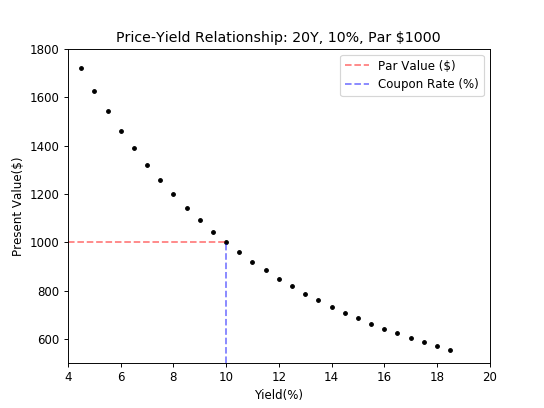

In [117]:
lowerylim = 500
upperylim = 1800
lowerxlim = 4
upperxlim = 20

plt.scatter(yields, prices, s=area, c="black", alpha=1)
plt.xlabel("Yield(%)")
plt.ylabel("Present Value($)")
plt.ylim(lowerylim, upperylim)
plt.xlim(lowerxlim, upperxlim)
plt.title("Price-Yield Relationship: 20Y, 10%, Par $1000")

xmax = (lowerxlim - c_rate)/((lowerxlim - c_rate)-(upperxlim -c_rate))

ymax = (lowerylim - par)/((lowerylim - par)-(upperylim - par))

plt.axhline(y = par, xmin = 0, xmax = xmax, color='r', linestyle='dashed',alpha=0.5,label="Par Value ($)")
plt.axvline(x = c_rate, ymin = 0, ymax = ymax, color='b', linestyle='dashed',alpha = 0.5, label="Coupon Rate (%)")
plt.legend(loc="upper right")

plt.show()

In [143]:
data = yield_to_price2()

Enter par value ($): 1000
Enter term to maturity (years): 20
annual or semi-annual? (a/s): s
Enter coupon rate (%): 10
Enter premium rate: 7.8
Enter discount rate: 12


In [144]:
%matplotlib notebook

<IPython.core.display.Javascript object>


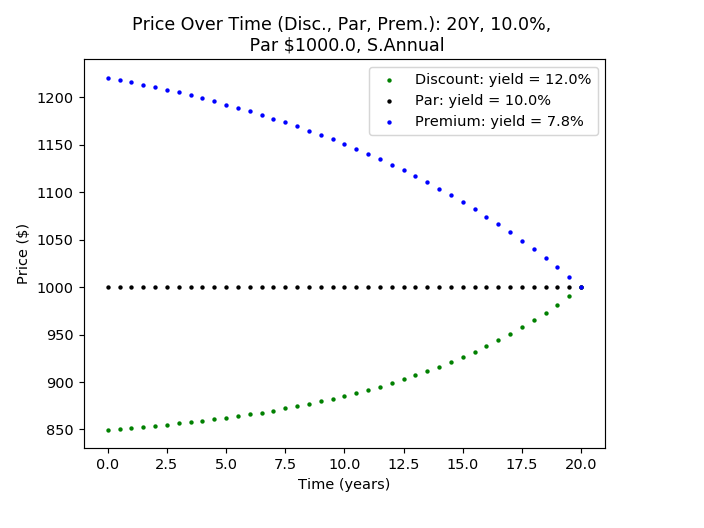

In [145]:
plt.scatter(data.time, data.discount_vals, c="green", alpha=1, s=4, label=f"Discount: yield = {data.disc_rate}%")
plt.scatter(data.time, data.par_vals, c="black", alpha=1,s=4, label=f"Par: yield = {data.coup_rate}%")
plt.scatter(data.time, data.premium_vals, c="blue", alpha=1,s=4, label=f"Premium: yield = {data.prem_rate}%")
ylower = 800


In [146]:

plt.xlabel("Time (years)")
plt.ylabel("Price ($)")
plt.title(f"Price Over Time (Disc., Par, Prem.): {data.plazo}Y, {data.coup_rate}%, \n Par ${data.par}, {data.freq}")
time_range = data.time[-1] - data.time[0]
plt.xlim(data.time[0] - time_range*0.05,data.time[-1] + time_range*0.05)

plt.legend(loc="upper right")


In [68]:
time_range

20.0

In [147]:
plt.savefig('figures/priceVStime.png')

In [105]:
def yield_to_price3():
    class to_graph:
        def __init__(self):
            #Assigning par value
            try:
                par = float(input("Enter par value ($): "))
                self.par = par
            except ValueError:
                raise Exception("Par value error: must be a number.")
            #Assigning term to maturity
            try:
                plazo = int(input("Enter term to maturity (years): "))
                self.plazo = plazo
            except ValueError:
                raise Exception("term to maturity error: must be a number")
            #Assigning payment frequency
            try:
                semi_or_ann = input("annual or semi-annual? (a/s): ")
                if semi_or_ann.upper() == "A":
                    freq = 1
                    self.freq = "Annual"
                elif semi_or_ann.upper() == "S":
                    freq = 2
                    self.freq = "S.Annual"
                else:
                    raise Exception('annual or semi-annual error: must be an "s" or an "a" ')
            except AttributeError:
                raise Exception('annual or semi-annual error: must be an "s" or an "a" ')
            #Assigning coupon rate 
            try:
                coup_rate = float(input("Enter coupon rate (%): "))
                self.coup_rate = coup_rate
            except ValueError:
                raise Exception("coupon rate error: must be a number")
            #Assigning required yield
            try:
                required_yield = float(input("Enter required yield (%): "))
                self.required_yield = required_yield
            except ValueError:
                raise Exception("required yield error: must be a number")


            time_ = np.arange(0,plazo + 1/freq, 1/freq)
            time = []
            for t in range(0, len(time_)):
                time.append(time_[-t-1])
                
            self.time = time_
            
            par_vals = []
            coup_vals = []
            total_vals = []
            
            for n in time:
                par_price = par/math.pow(1+required_yield/100/freq,n*freq)
                par_vals.append(round(par_price, 6))
                coup_price = ((coup_rate/100)*par/freq)*((1-(1/(math.pow(1+required_yield/100/freq,n*freq))))/(required_yield/100/freq))
                coup_vals.append(round(coup_price, 6))
                total_price = par_price + coup_price
                total_vals.append(round(total_price, 6))
                
            self.par_vals = par_vals
            self.coup_vals = coup_vals
            self.total_vals = total_vals
            
    return to_graph()

In [138]:
data2 = yield_to_price3()

Enter par value ($): 1000
Enter term to maturity (years): 20
annual or semi-annual? (a/s): s
Enter coupon rate (%): 10
Enter required yield (%): 10


In [139]:
%matplotlib notebook

<IPython.core.display.Javascript object>


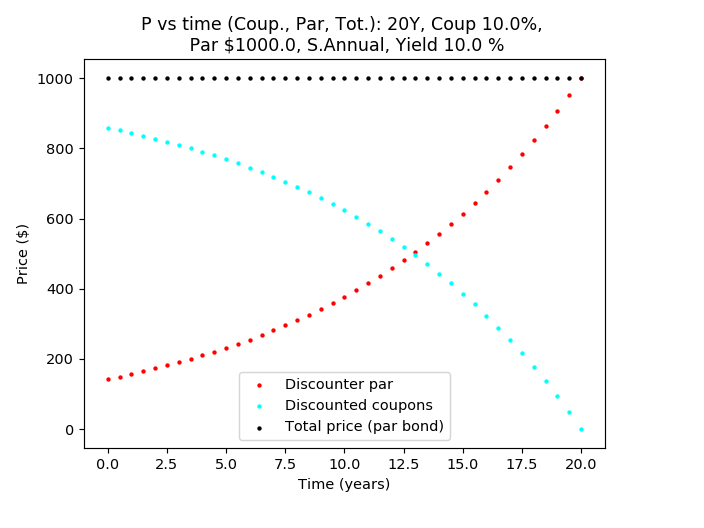

In [140]:
plt.scatter(data2.time, data2.par_vals, c="red", alpha=1, s=4, label=f"Discounter par")
plt.scatter(data2.time, data2.coup_vals, c="cyan", alpha=1,s=4, label=f"Discounted coupons")
plt.scatter(data2.time, data2.total_vals, c="black", alpha=1,s=4, label=f"Total price (par bond)")
ylower = 800

In [141]:

plt.xlabel("Time (years)")
plt.ylabel("Price ($)")
plt.title(f"P vs time (Coup., Par, Tot.): {data2.plazo}Y, Coup {data2.coup_rate}%, \n Par ${data2.par}, {data2.freq}, Yield {data2.required_yield} %")
time_range = data2.time[-1] - data2.time[0]
plt.xlim(data2.time[0] - time_range*0.05,data2.time[-1] + time_range*0.05)

plt.legend(loc="lower center")


In [142]:
plt.savefig("figures/parAndCoup_parbond.png")

In [104]:
import pandas as pd
pd.DataFrame(
    {
        "time":data2.time,
        "par":data2.par_vals,
        "coup":data2.coup_vals,
        "tot":data2.total_vals
    }
)

,time,par,coup,tot
0,0.0,142.045682,857.954318,1000.0
1,0.5,149.147966,850.852034,1000.0
2,1.0,156.605365,843.394635,1000.0
3,1.5,164.435633,835.564367,1000.0
4,2.0,172.657415,827.342585,1000.0
5,2.5,181.290285,818.709715,1000.0
6,3.0,190.354800,809.645200,1000.0
7,3.5,199.872540,800.127460,1000.0
8,4.0,209.866167,790.133833,1000.0
9,4.5,220.359475,779.640525,1000.0
